# Modelo de Regresion

In [72]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

import seaborn as sns

In [124]:
data = pd.read_csv("data/housing_train.csv")

In [37]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [82]:
data["SalePrice"].mean()

np.float64(180921.19589041095)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Modelamiento

In [49]:
modeling_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [45]:
modeling_data = data.dropna()

In [117]:
FEATURES = ["LotFrontage", "LotArea", "YearBuilt", "1stFlrSF", "MoSold"]
TARGET = ["SalePrice"]
modeling_data = data[FEATURES + TARGET].dropna()
X = modeling_data[FEATURES]
X["constant"] = 1 

y = modeling_data["SalePrice"]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100,test_size=0.2)

In [119]:
X_train

,LotFrontage,LotArea,YearBuilt,1stFlrSF,MoSold,constant
179,60.0,8520,1923,968,7,1
1130,65.0,7804,1928,1328,12,1
1330,85.0,10000,2006,1588,12,1
1331,55.0,10780,1976,954,7,1
333,59.0,8198,2004,1358,7,1
...,...,...,...,...,...,...
969,75.0,10382,1958,1095,3,1
62,44.0,6442,2006,1370,10,1
427,77.0,8593,1957,907,7,1
92,80.0,13360,1921,964,8,1


In [120]:
y_train

179     100000
1130    135000
1330    227000
1331    132500
333     207000
         ...  
969     140000
62      202500
427     109008
92      163500
957     132000
Name: SalePrice, Length: 960, dtype: int64

In [121]:

model = sm.OLS(y_train, X_train)

In [122]:
result = model.fit()

In [123]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     237.9
Date:                Thu, 05 Jun 2025   Prob (F-statistic):          6.45e-165
Time:                        02:06:52   Log-Likelihood:                -11866.
No. Observations:                 960   AIC:                         2.374e+04
Df Residuals:                     954   BIC:                         2.377e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
LotFrontage   375.3962     89.534      4.193      

In [109]:
lr = LinearRegression()

In [110]:
lr.fit(X_train, y_train)

LinearRegression()

In [111]:
predictions_vector = lr.predict(X_test)

In [112]:
predictions = pd.DataFrame({
    "predictions":predictions_vector,
    "real" : y_test
})

<Axes: xlabel='predictions', ylabel='real'>

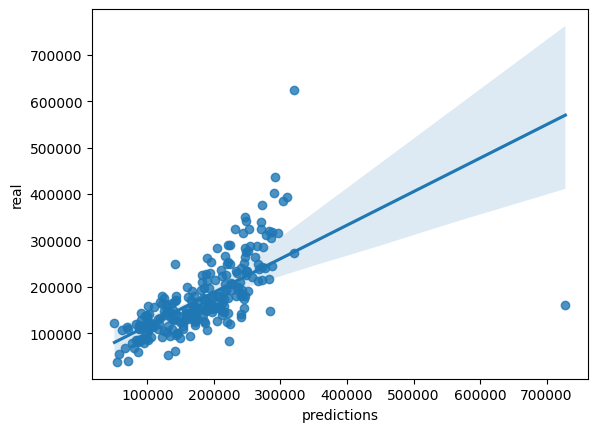

In [113]:
sns.regplot(x="predictions", y="real", data=predictions, )

<Axes: xlabel='predictions', ylabel='real'>

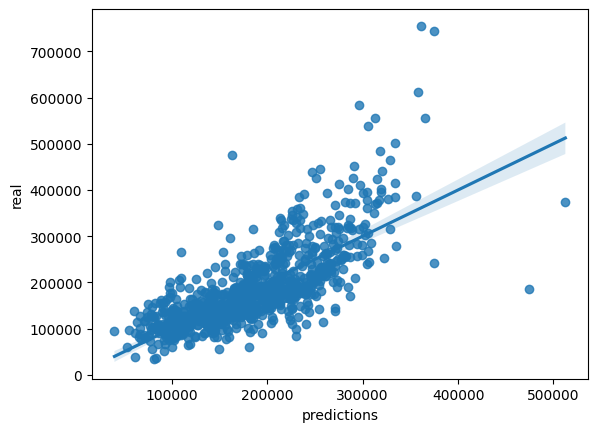

In [114]:
train = pd.DataFrame({
    "predictions":lr.predict(X_train),
    "real" : y_train
})
sns.regplot(x="predictions", y="real", data=train, )

In [115]:
r2_score( y_train, lr.predict(X_train),)

0.5549360721232621

In [116]:
mean_squared_error(y_train, lr.predict(X_train),)**0.5

56469.31579287846